In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [220]:
import pylab as pl
pl.rcParams['figure.dpi'] = 120

In [221]:
class Deck():
    
    def __init__(self, bistro):
        self.library = np.random.permutation(bistro)
        self.hand = np.r_[[]]
        self.draw(7)
        self.lands = 0
        self.mana = 0
        
    def draw(self, n=1):
        for i in xrange(n):
            picked = self.library[0]
            self.library = self.library[1:]
            self.hand = np.append(self.hand, picked)
        return picked
    
    def play(self):
        picked = self.draw()
        land = self.land()
        played = self.cast()
        discarded = self.discard()
#         print "Land", land, "Played", played, "Discarded", discarded
        return land, picked, played, discarded
        
    def land(self):
        try:
            which = np.where(self.hand==0)[0][0]
            self.hand = np.delete(self.hand, which)
            self.lands += 1
            toret = 1
        except IndexError:
#             print "No land in hand. :("
            toret = 0
        return toret
    
    def cast(self):
        total_mana = np.sum(self.lands)
        played = []
        while total_mana > 0:
            try:
                which = np.random.choice([w for w in np.where(self.hand<=total_mana)[0] if self.hand[w]>0])
                total_mana -= self.hand[which]
                played.append(self.hand[which])
                self.hand = np.delete(self.hand, which) 
            except:
                break
        return played
    
    def discard(self):
        if len(self.hand) > 7:
            which = np.random.choice(np.where(self.hand>0)[0])
            toret = self.hand[which]
            self.hand = np.delete(self.hand, which)
        else:
            toret = None
        return toret

In [232]:
# blu nero
# 20; 3, 15, 9, 9, 2, 2
bistro = [0]*20 + [1]*3 + [2]*15 + [3]*9 + [4]*9 + [5]*2 + [6]*2
len(bistro)

60

In [233]:
deck = Deck(bistro)

print deck.hand
lands = [0]
hands = [len(deck.hand)]
for i in xrange(50):    
    print "----"
    l, draw, played, discarded = deck.play()
    print "Lands", deck.lands
    print "Picked", draw
    print "Played", played
    print "Discarded", discarded
    print "Hand", deck.hand
    lands.append(deck.lands)
    hands.append(len(deck.hand))

[ 2.  2.  0.  0.  2.  0.  0.]
----
Lands 1
Picked 3
Played []
Discarded None
Hand [ 2.  2.  0.  2.  0.  0.  3.]
----
Lands 2
Picked 4
Played [2.0]
Discarded None
Hand [ 2.  2.  0.  0.  3.  4.]
----
Lands 3
Picked 3
Played [2.0]
Discarded None
Hand [ 2.  0.  3.  4.  3.]
----
Lands 4
Picked 1
Played [2.0, 1.0]
Discarded None
Hand [ 3.  4.  3.]
----
Lands 4
Picked 1
Played [4.0]
Discarded None
Hand [ 3.  3.  1.]
----
Lands 4
Picked 2
Played [3.0, 1.0]
Discarded None
Hand [ 3.  2.]
----
Lands 5
Picked 0
Played [2.0, 3.0]
Discarded None
Hand []
----
Lands 5
Picked 4
Played [4.0]
Discarded None
Hand []
----
Lands 5
Picked 3
Played [3.0]
Discarded None
Hand []
----
Lands 6
Picked 0
Played []
Discarded None
Hand []
----
Lands 7
Picked 0
Played []
Discarded None
Hand []
----
Lands 8
Picked 0
Played []
Discarded None
Hand []
----
Lands 9
Picked 0
Played []
Discarded None
Hand []
----
Lands 9
Picked 2
Played [2.0]
Discarded None
Hand []
----
Lands 9
Picked 4
Played [4.0]
Discarded None
Hand []
--

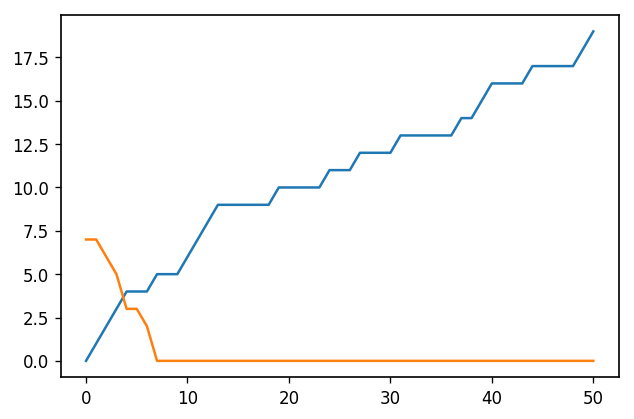

In [234]:
pl.plot(lands)
pl.plot(hands)

In [276]:
def simulate(deck_stat, n=100, n_rounds=20):
    hh = []
    ll = []
    for i in range(n):

        deck = Deck(deck_stat)

        lands = [0]
        hands = [len(deck.hand)]
        for i in xrange(n_rounds):    
            l, draw, played, discarded = deck.play()
            lands.append(deck.lands)
            hands.append(len(deck.hand))

        hh.append(hands)
        ll.append(lands)

    hh = np.r_[hh]
    ll = np.r_[ll]
    
    return hh, ll

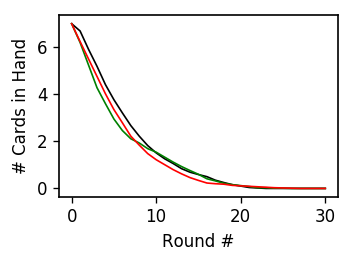

In [280]:
deck_r = [0]*20 + [1]*9 + [2]*6 + [3]*22 + [4]*1 + [5]*2
deck_bk = [0]*20 + [1]*3 + [2]*15 + [3]*9 + [4]*9 + [5]*2 + [6]*2
deck_wg = [0]*20 + [1]*12 + [2]*9 + [3]*5 + [4]*7 + [5]*1 + [6]*6

hh_r, ll_r = simulate(deck_r, n_rounds=30)
hh_bk, ll_bk = simulate(deck_bk, n_rounds=30)
hh_wg, ll_wg = simulate(deck_wg, n_rounds=30)


fig, ax = pl.subplots(1, 1, figsize=(3, 2))
ax.plot(hh_bk.mean(0), color='k', lw=1)
ax.plot(hh_wg.mean(0), color='g', lw=1)
ax.plot(hh_r.mean(0), color='r', lw=1)

ax.set_xlabel('Round #')
ax.set_ylabel('# Cards in Hand')